In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [76]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"])

# Reset index to make 'date' a column again
df.reset_index(inplace=True)

In [77]:
print(df.columns)

Index(['index', 'date', 'value'], dtype='object')


In [78]:
df.head()

,index,date,value
0,0,2016-05-09,1201
1,1,2016-05-10,2329
2,2,2016-05-11,1716
3,3,2016-05-12,10539
4,4,2016-05-13,6933


In [79]:
df["date"] = pd.to_datetime(df["date"])

In [6]:
# Clean data
# filter out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
# this operation removes outliers that would bias our results

#calculate the quantiles
top_quantile = df['value'].quantile(0.975) # top 2.5%
bottom_quantile = df['value'].quantile(0.025) # bottom 2.5%
# filter the df
df = df[(df['value'] >= bottom_quantile) & (df['value'] <= top_quantile)]

# it could also be done in a single line code applying methods directly
# df = df[(df.value > df.value.quantile(0.025)) & (df.value < df.value.quantile(0.975))]

In [36]:
def draw_line_plot():
    # Draw line plot
    # title 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'
    # x axis label - Date
    # y axis label - Page Views

    # figure & plot
    # 'plt.subplots' creates Figure and Axes objects
    # this is mandatory to be able to later call 'savefig' method on an Axes object 'fig'
    fig, ax = plt.subplots(figsize=(12,6))
    df.plot.line(ax=ax, color='red', legend=False)

    # title & labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

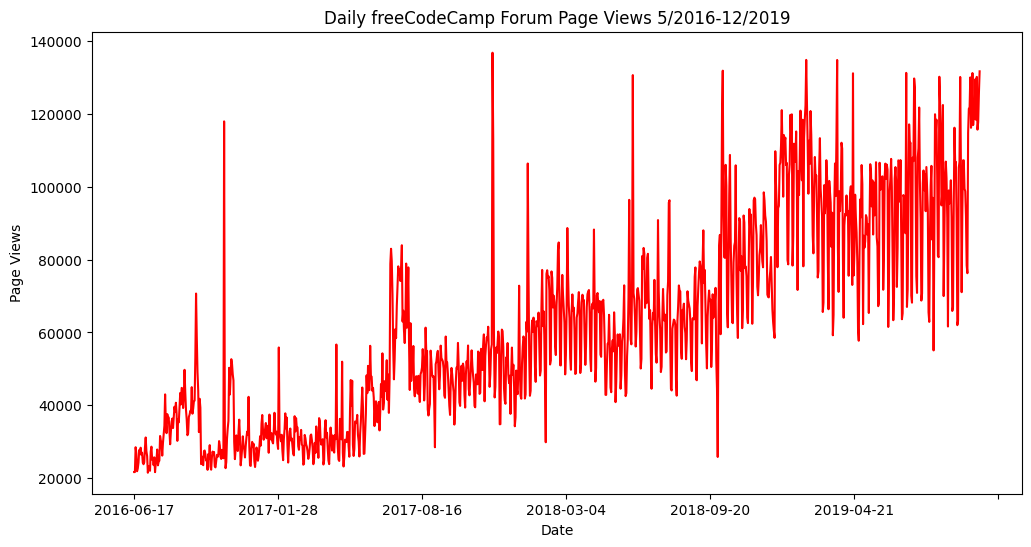

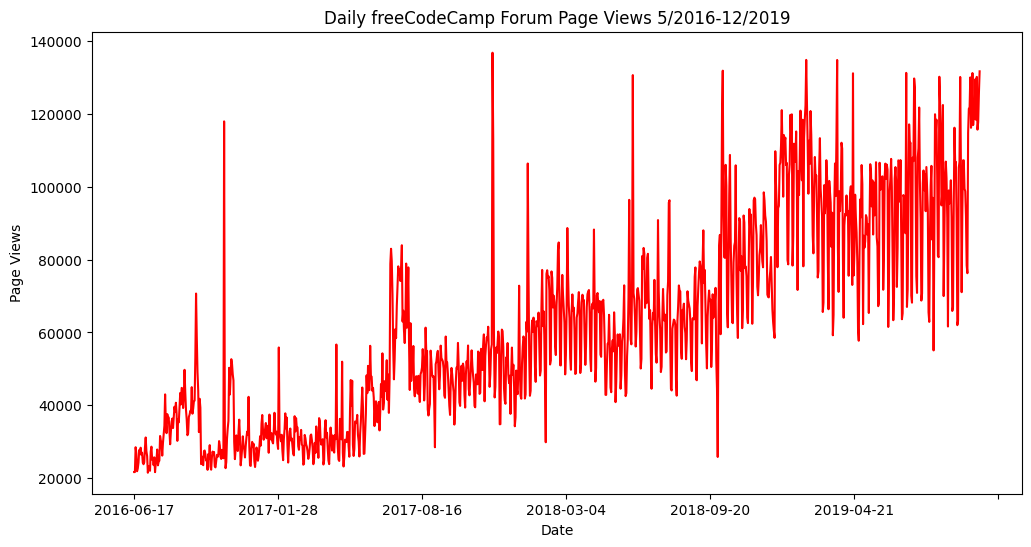

In [37]:
draw_line_plot()

In [80]:
# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [81]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    
    # The legend - month labels, title - Months
    # x axis label - Years, y axis label - Average Page Views.
    
    # Group by year and month, then calculate the mean of 'value' for each group
    # unstack() is used to pivot the data so that each month becomes a column
    df_bar = df.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Draw bar plot
    # Create figure & plot
    fig, ax = plt.subplots(figsize=(12, 6))
    df_bar.plot(kind='bar', ax=ax)
    # Title & labels
    ax.set_title('Average Daily freeCodeCamp Forum Page Views by Month')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')

    # Legend
    ax.legend(title='Months', labels=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

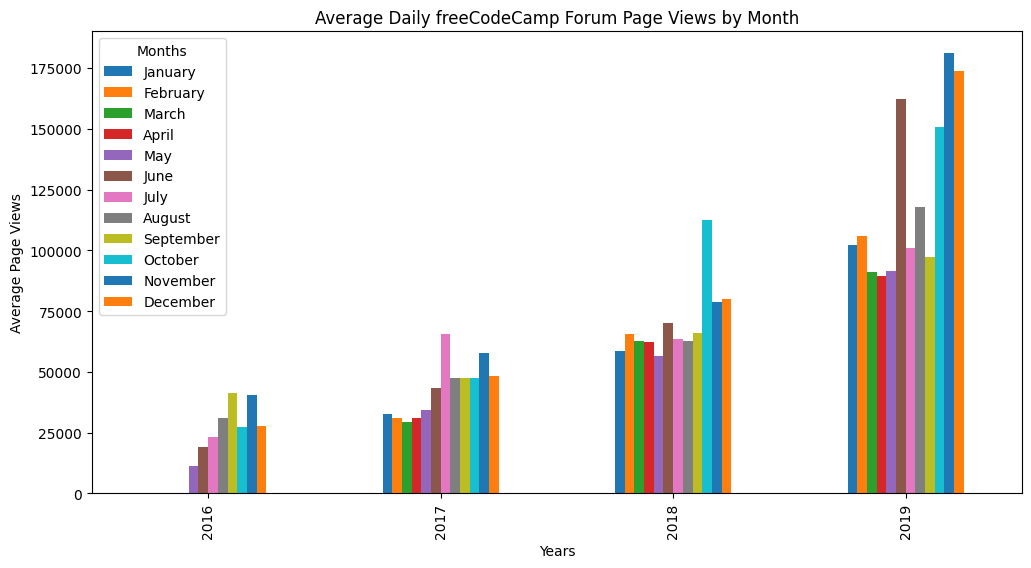

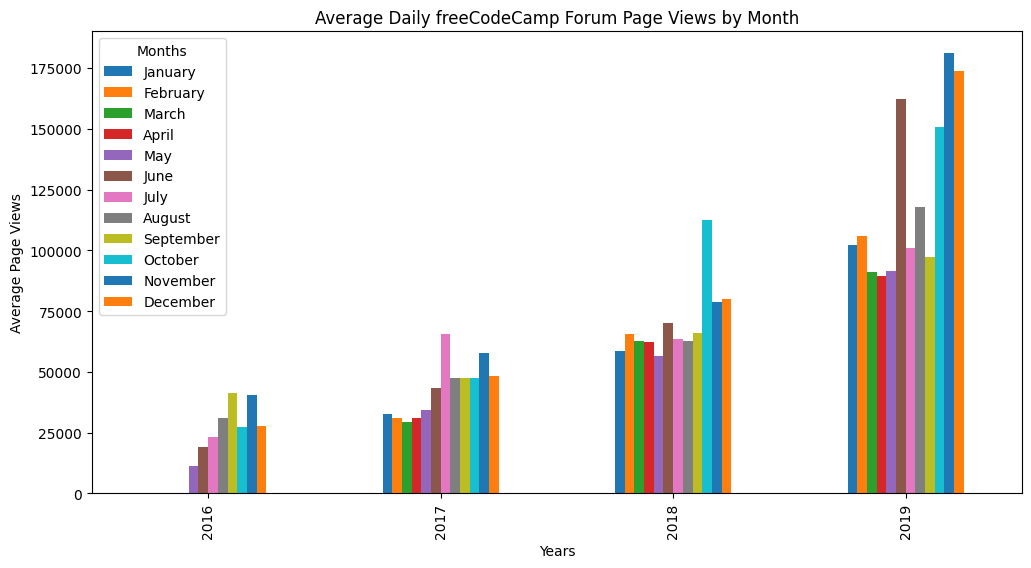

In [82]:
draw_bar_plot()

In [98]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    # Copy the DataFrame to avoid modifying the original data
    df_copy_year = df.copy()
    df_copy_month = df.copy()
    # Extract year and month from the 'date' column
    df_copy_year['year'] = df_copy_year['date'].dt.year
    df_copy_month['month'] = df_copy_month['date'].dt.month_name()

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Draw year-wise box plot
    sns.boxplot(x='year', y='value', data=df_copy_year, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    axes[0].set_yscale('log')  # Set y-axis scale to logarithmic

    # Draw month-wise box plot
    sns.boxplot(x='month', y='value', data=df_copy_month, ax=axes[1], order=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    axes[1].set_yscale('log')  # Set y-axis scale to logarithmic

    # Rotate x-axis labels for better readability
    axes[1].tick_params(axis='x', rotation=45)

    # Adjust layout and spacing between subplots
    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

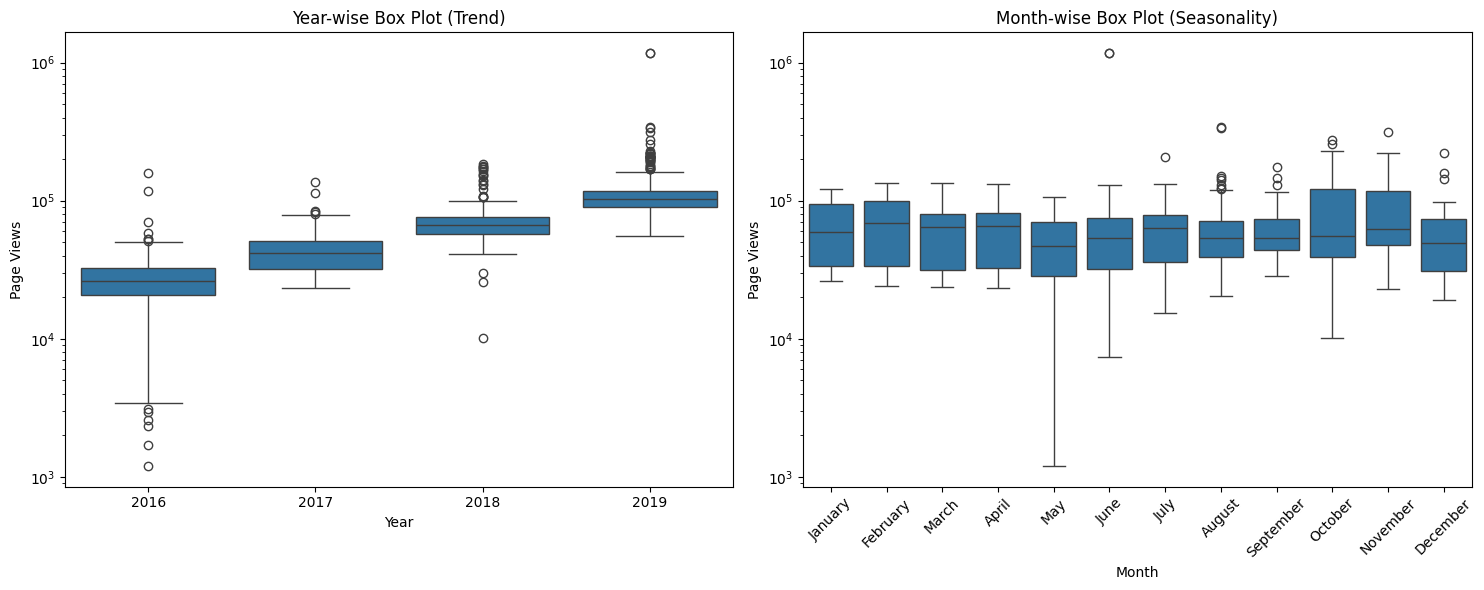

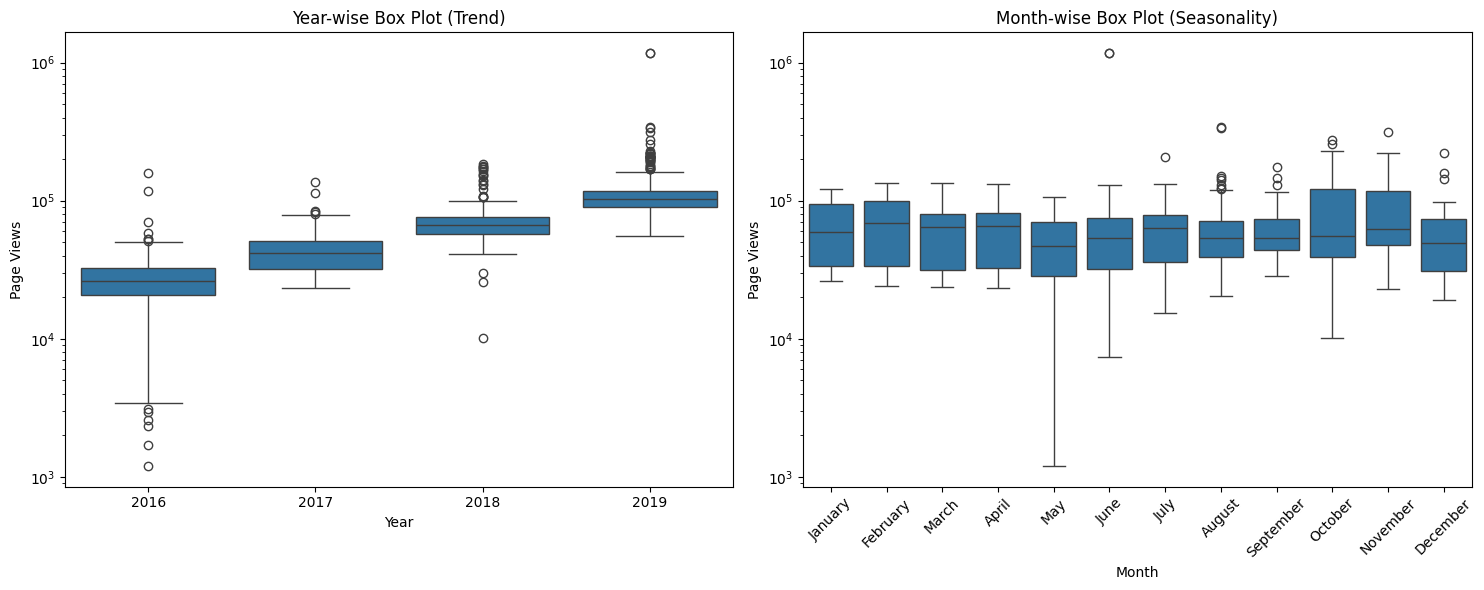

In [99]:
draw_box_plot()